In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the dataset
file_path = '/content/HealthcareInventoryDataset2.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Medication_Brand      Medication_Type  Unit_Price  Dosage_Size Volume  \
0                58          Cough Syrup       129.9          5.0    750   
1                62             Sedative       369.9          5.0    750   
2                63          Cough Syrup       389.9          5.0    750   
3                72            Analgesic       349.9          5.0    750   
4                75  Diabetes Medication       149.9          5.0    750   

   Category  Purchase_Price  Supplier_ID      Supplier_Name  
0         1            9.28         8320   MediDistributors  
1         1           28.67         1128  LifeCare Supplies  
2         1           30.46         1128           MediCorp  
3         1           26.11         9165      MedSupply Co.  
4         1           10.94         7245           MediCorp  
       Medication_Brand     Unit_Price  Dosage_Size      Category  \
count      12261.000000   12261.000000      12261.0  12261.000000   
mean       17989.067123     386.4

In [6]:
# Drop any rows with missing values (if any exist)
df_cleaned = df.dropna()

# Ensure data types are appropriate
df_cleaned['Unit_Price'] = df_cleaned['Unit_Price'].astype(float)
df_cleaned['Dosage_Size'] = df_cleaned['Dosage_Size'].astype(float)
df_cleaned['Purchase_Price'] = df_cleaned['Purchase_Price'].astype(float)


<ipython-input-6-8e822af9a919>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Unit_Price'] = df_cleaned['Unit_Price'].astype(float)
<ipython-input-6-8e822af9a919>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dosage_Size'] = df_cleaned['Dosage_Size'].astype(float)
<ipython-input-6-8e822af9a919>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [11]:
# Identify non-numeric values in the 'Volume' column
non_numeric_volume = df_cleaned[~df_cleaned['Volume'].apply(lambda x: x.replace('.', '', 1).isdigit())]
print("Non-numeric Volume values:")
print(non_numeric_volume)

# Replace non-numeric values with NaN
df_cleaned['Volume'] = pd.to_numeric(df_cleaned['Volume'], errors='coerce')

# Handle NaN values if any (e.g., filling with mean or median, or dropping)
df_cleaned['Volume'].fillna(df_cleaned['Volume'].mean(), inplace=True)

# Now, perform the type conversion and feature engineering
df_cleaned.loc[:, 'Unit_Price'] = df_cleaned['Unit_Price'].astype(float)
df_cleaned.loc[:, 'Dosage_Size'] = df_cleaned['Dosage_Size'].astype(float)
df_cleaned.loc[:, 'Purchase_Price'] = df_cleaned['Purchase_Price'].astype(float)
df_cleaned.loc[:, 'Volume'] = df_cleaned['Volume'].astype(float)

# Create new features using .loc[] to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'Price_Margin'] = df_cleaned['Unit_Price'] - df_cleaned['Purchase_Price']
df_cleaned.loc[:, 'Total_Value'] = df_cleaned['Unit_Price'] * df_cleaned['Volume']

# Display the new features
print(df_cleaned.head())


Non-numeric Volume values:
       Medication_Brand         Medication_Type  Unit_Price  Dosage_Size  \
542                2993  Cholesterol Medication        74.9          5.0   
5921               9908               Antiviral       210.1          5.0   
8795               8992              Antiseptic        19.9          5.0   
10009             90590     Diabetes Medication       199.5          5.0   

        Volume  Category  Purchase_Price  Supplier_ID  \
542    Unknown         1            5.39         5895   
5921   Unknown         1           16.15         4425   
8795   Unknown         1            1.43         1703   
10009  Unknown         2           13.12         4425   

                    Supplier_Name  Price_Margin  
542                       MedLink         69.51  
5921   Global Health Distributors        193.95  
8795         PharmaTech Solutions         18.47  
10009         HealthPlus Supplies        186.38  
   Medication_Brand      Medication_Type  Unit_Price  Do

<ipython-input-11-e3a7a93dc4fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Volume'] = pd.to_numeric(df_cleaned['Volume'], errors='coerce')
<ipython-input-11-e3a7a93dc4fb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Volume'].fillna(df_cleaned['Volume'].mean(), inplace=True)
<ipython-input-11-e3a7a93dc4fb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

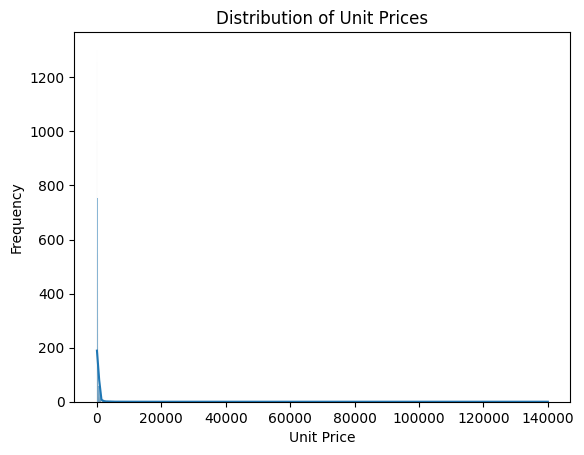

In [12]:
#DATA VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Unit Prices
sns.histplot(df_cleaned['Unit_Price'], kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


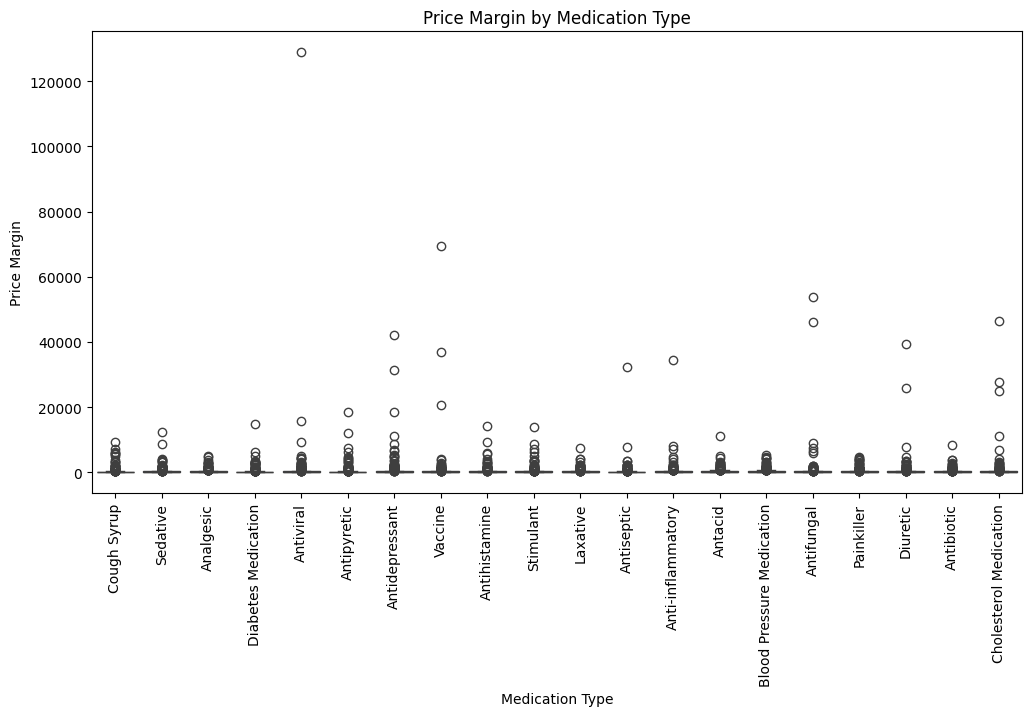

In [13]:
# Visualize the Price Margin per Medication Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medication_Type', y='Price_Margin', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Price Margin by Medication Type')
plt.xlabel('Medication Type')
plt.ylabel('Price Margin')
plt.show()


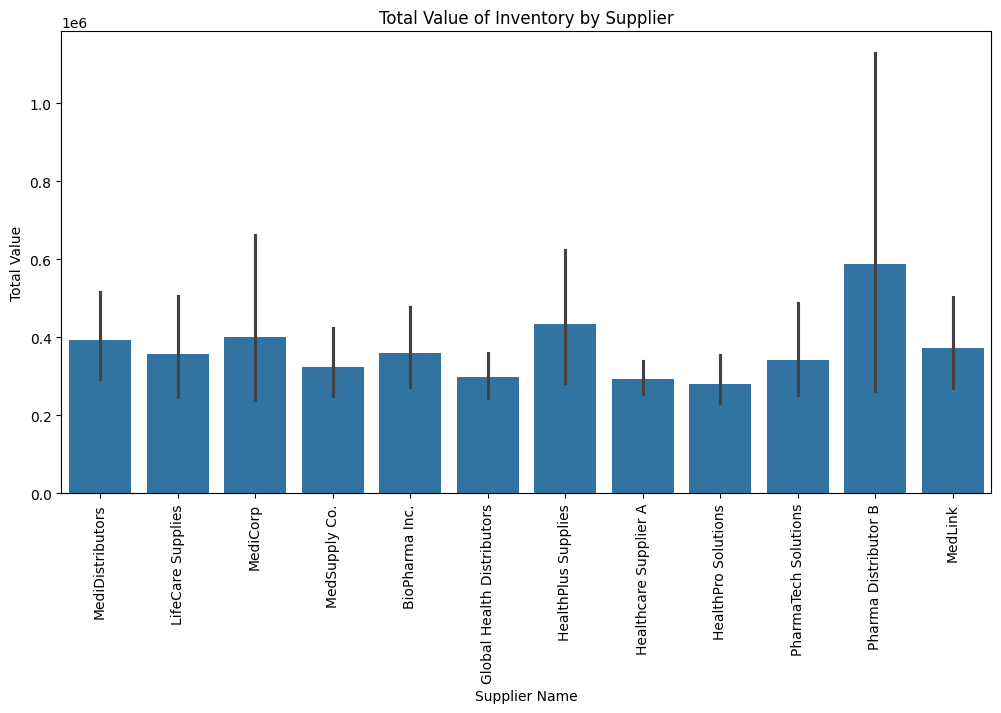

In [14]:
# Visualize Total Value by Supplier
plt.figure(figsize=(12, 6))
sns.barplot(x='Supplier_Name', y='Total_Value', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Total Value of Inventory by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Total Value')
plt.show()


In [15]:
# PREDICTIVE MODELING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = df_cleaned[['Unit_Price', 'Dosage_Size', 'Volume', 'Price_Margin', 'Total_Value']]
y = df_cleaned['Purchase_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.662053017944541
Mean Squared Error: 58.24650627189256
Root Mean Squared Error: 7.631939876066409


In [17]:
# EVALUATE THE MODEL
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.662053017944541
Mean Squared Error: 58.24650627189256
Root Mean Squared Error: 7.631939876066409


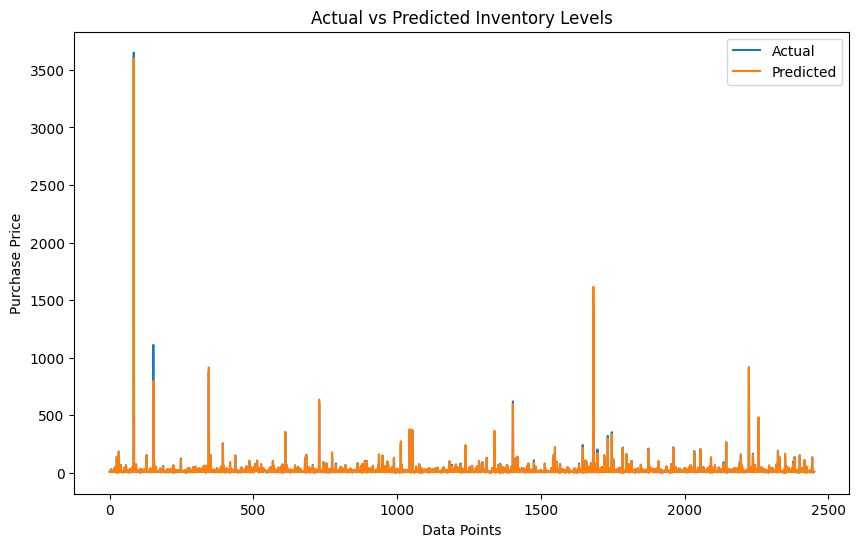

In [18]:
# VISUALISING PREDICTION VS ACTUAL VALUES
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Inventory Levels')
plt.xlabel('Data Points')
plt.ylabel('Purchase Price')
plt.legend()
plt.show()


In [19]:
#FORECAST FUTURE INVENTORY NEEDS
import numpy as np

# Simulating future data based on patterns in the training data
# Example: Simulate 10 future data points

future_data = {
    'Unit_Price': np.random.uniform(df_cleaned['Unit_Price'].min(), df_cleaned['Unit_Price'].max(), 10),
    'Dosage_Size': np.random.choice(df_cleaned['Dosage_Size'].unique(), 10),
    'Volume': np.random.uniform(df_cleaned['Volume'].min(), df_cleaned['Volume'].max(), 10),
    'Price_Margin': np.random.uniform(df_cleaned['Price_Margin'].min(), df_cleaned['Price_Margin'].max(), 10),
    'Total_Value': np.random.uniform(df_cleaned['Total_Value'].min(), df_cleaned['Total_Value'].max(), 10)
}

future_df = pd.DataFrame(future_data)

# Display the simulated future data
print(future_df)


      Unit_Price  Dosage_Size        Volume   Price_Margin   Total_Value
0   58685.176420          5.0  18238.822138  121748.421718  6.211704e+07
1      98.033058          5.0   8980.549954   85646.981392  2.489702e+08
2   99338.125175          5.0   7285.879363   53345.532032  1.443774e+08
3   58951.750208          5.0   7931.609085   21655.950700  2.660977e+07
4  128594.566700          5.0  19922.326387   62913.051775  1.681022e+08
5  110832.739124          5.0   8528.321975   10509.478792  1.930721e+08
6  122908.848654          5.0  16257.375255  114589.521523  1.890961e+08
7   86673.086743          5.0  19388.212600  103212.856503  2.049657e+08
8   24559.978614          5.0   1481.899586   64524.494406  8.049629e+07
9   63137.361015          5.0  12117.358053   33133.560975  1.999772e+08


In [20]:
# Scale the future data
future_data_scaled = scaler.transform(future_df)


In [22]:
# Make predictions on the future data using the previously trained model
future_predictions = model.predict(future_data_scaled)

# Display the predicted purchase prices for future inventory
print("Predicted Purchase Prices for Future Inventory:")
print(future_predictions)


Predicted Purchase Prices for Future Inventory:
[6870.4673 2899.1364 5986.0318 2670.1132 7270.9356 4107.5756 9579.1886
 7973.5189 3658.2271 4180.5675]


      Unit_Price  Dosage_Size        Volume   Price_Margin   Total_Value  \
0   58685.176420          5.0  18238.822138  121748.421718  6.211704e+07   
1      98.033058          5.0   8980.549954   85646.981392  2.489702e+08   
2   99338.125175          5.0   7285.879363   53345.532032  1.443774e+08   
3   58951.750208          5.0   7931.609085   21655.950700  2.660977e+07   
4  128594.566700          5.0  19922.326387   62913.051775  1.681022e+08   
5  110832.739124          5.0   8528.321975   10509.478792  1.930721e+08   
6  122908.848654          5.0  16257.375255  114589.521523  1.890961e+08   
7   86673.086743          5.0  19388.212600  103212.856503  2.049657e+08   
8   24559.978614          5.0   1481.899586   64524.494406  8.049629e+07   
9   63137.361015          5.0  12117.358053   33133.560975  1.999772e+08   

   Predicted_Purchase_Price  
0                 6870.4673  
1                 2899.1364  
2                 5986.0318  
3                 2670.1132  
4            

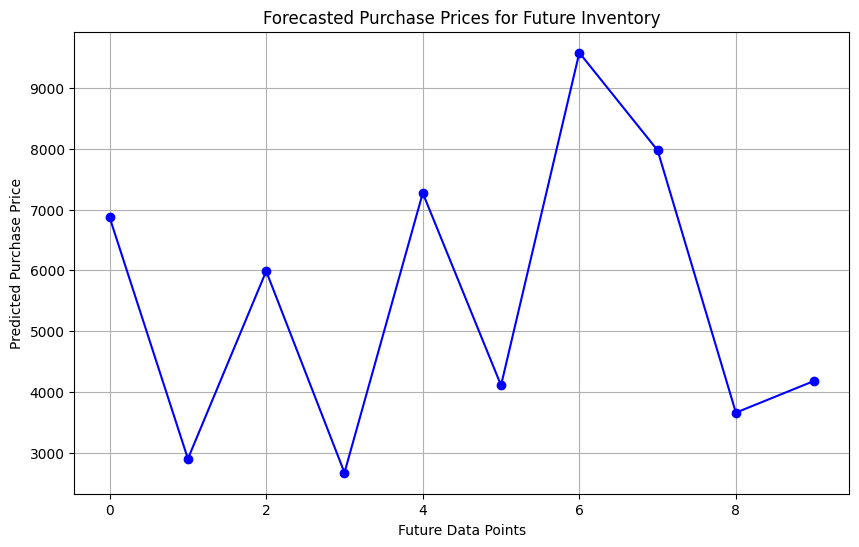

In [23]:
# Combine the predictions with the future data for better analysis
future_df['Predicted_Purchase_Price'] = future_predictions

# Display the future data with predictions
print(future_df)

# Visualize the forecasted purchase prices
plt.figure(figsize=(10, 6))
plt.plot(future_df.index, future_df['Predicted_Purchase_Price'], marker='o', linestyle='-', color='blue')
plt.title('Forecasted Purchase Prices for Future Inventory')
plt.xlabel('Future Data Points')
plt.ylabel('Predicted Purchase Price')
plt.grid(True)
plt.show()


In [24]:
#CREATING LAG FEATURES
# Creating lag features for 'Purchase_Price' and 'Volume'

# Lag by 1 period
df_cleaned['Lag_1_Purchase_Price'] = df_cleaned['Purchase_Price'].shift(1)
df_cleaned['Lag_1_Volume'] = df_cleaned['Volume'].shift(1)

# Lag by 2 periods
df_cleaned['Lag_2_Purchase_Price'] = df_cleaned['Purchase_Price'].shift(2)
df_cleaned['Lag_2_Volume'] = df_cleaned['Volume'].shift(2)

# Lag by 3 periods (optional)
df_cleaned['Lag_3_Purchase_Price'] = df_cleaned['Purchase_Price'].shift(3)
df_cleaned['Lag_3_Volume'] = df_cleaned['Volume'].shift(3)

# Drop rows with NaN values created due to the shift
df_cleaned.dropna(inplace=True)

# Display the updated DataFrame with lag features
print(df_cleaned[['Purchase_Price', 'Lag_1_Purchase_Price', 'Lag_2_Purchase_Price', 'Volume', 'Lag_1_Volume']].head())


   Purchase_Price  Lag_1_Purchase_Price  Lag_2_Purchase_Price  Volume  \
3           26.11                 30.46                 28.67   750.0   
4           10.94                 26.11                 30.46   750.0   
5           10.39                 10.94                 26.11   750.0   
6            9.62                 10.39                 10.94   750.0   
7           21.37                  9.62                 10.39  1000.0   

   Lag_1_Volume  
3         750.0  
4         750.0  
5         750.0  
6         750.0  
7         750.0  


<ipython-input-24-8677978e282e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Lag_1_Purchase_Price'] = df_cleaned['Purchase_Price'].shift(1)
<ipython-input-24-8677978e282e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Lag_1_Volume'] = df_cleaned['Volume'].shift(1)
<ipython-input-24-8677978e282e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [25]:
# Define the updated feature set to include lag features
X = df_cleaned[['Unit_Price', 'Dosage_Size', 'Volume', 'Price_Margin', 'Total_Value',
                'Lag_1_Purchase_Price', 'Lag_2_Purchase_Price', 'Lag_1_Volume', 'Lag_2_Volume']]
y = df_cleaned['Purchase_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data as before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model with lag features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE with Lag Features: {rmse}')


RMSE with Lag Features: 8.117709503100105


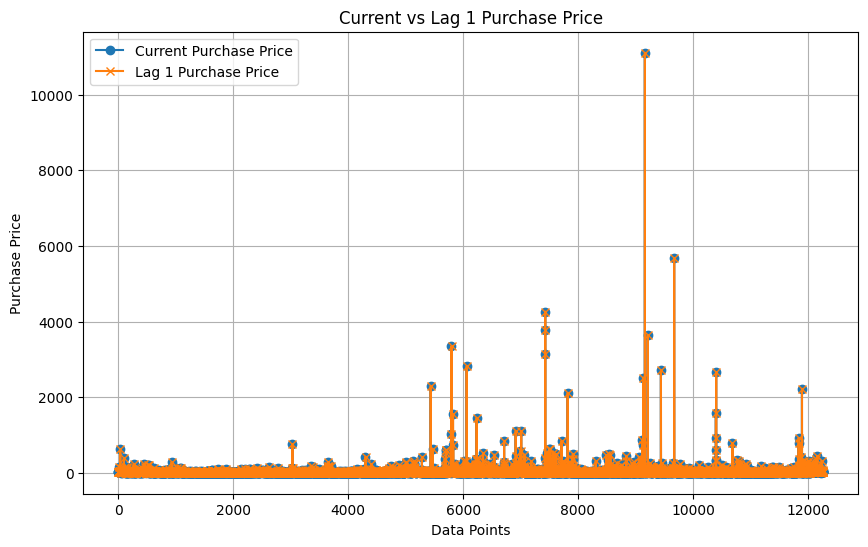

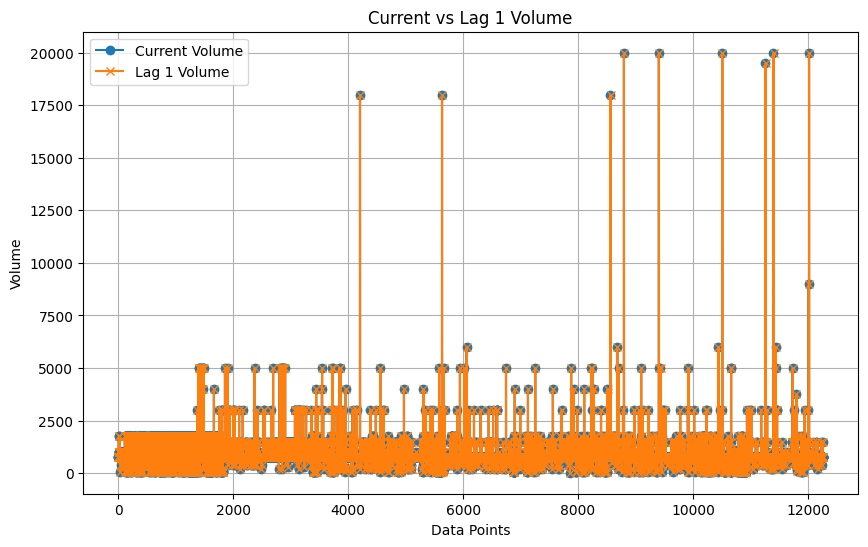

In [26]:
import matplotlib.pyplot as plt

# Plot 'Purchase_Price' vs 'Lag_1_Purchase_Price'
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Purchase_Price'], label='Current Purchase Price', marker='o')
plt.plot(df_cleaned['Lag_1_Purchase_Price'], label='Lag 1 Purchase Price', marker='x')
plt.title('Current vs Lag 1 Purchase Price')
plt.xlabel('Data Points')
plt.ylabel('Purchase Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 'Volume' vs 'Lag_1_Volume'
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Volume'], label='Current Volume', marker='o')
plt.plot(df_cleaned['Lag_1_Volume'], label='Lag 1 Volume', marker='x')
plt.title('Current vs Lag 1 Volume')
plt.xlabel('Data Points')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


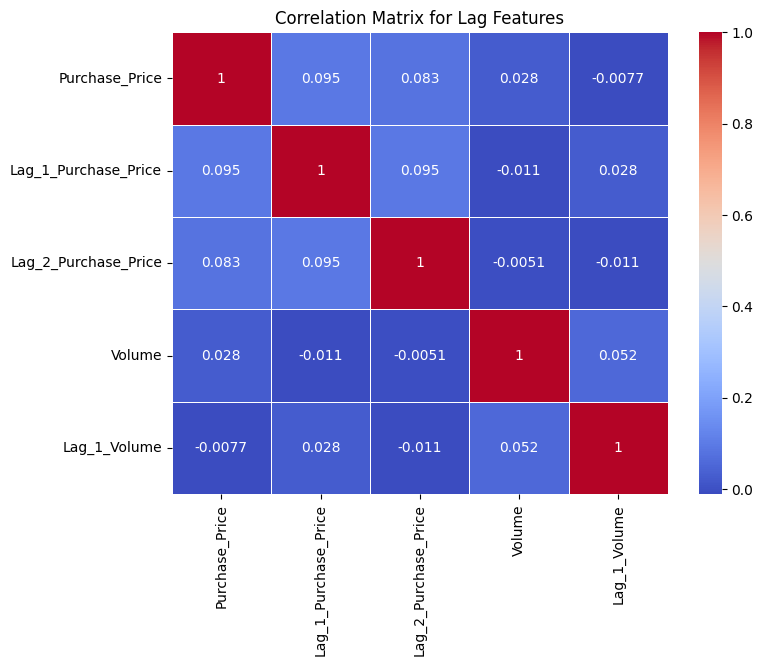

In [27]:
# Check correlation between Purchase_Price and lag features
correlation_matrix = df_cleaned[['Purchase_Price', 'Lag_1_Purchase_Price', 'Lag_2_Purchase_Price', 'Volume', 'Lag_1_Volume']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Lag Features')
plt.show()


In [28]:
#FORECASTING WITH LAG FEATURES
# Simulate future data with lag features
future_data = {
    'Unit_Price': np.random.uniform(df_cleaned['Unit_Price'].min(), df_cleaned['Unit_Price'].max(), 10),
    'Dosage_Size': np.random.choice(df_cleaned['Dosage_Size'].unique(), 10),
    'Volume': np.random.uniform(df_cleaned['Volume'].min(), df_cleaned['Volume'].max(), 10),
    'Price_Margin': np.random.uniform(df_cleaned['Price_Margin'].min(), df_cleaned['Price_Margin'].max(), 10),
    'Total_Value': np.random.uniform(df_cleaned['Total_Value'].min(), df_cleaned['Total_Value'].max(), 10),
    'Lag_1_Purchase_Price': df_cleaned['Purchase_Price'].tail(10).values,  # Simulating based on the last 10 values
    'Lag_2_Purchase_Price': df_cleaned['Purchase_Price'].shift(1).tail(10).values,
    'Lag_1_Volume': df_cleaned['Volume'].tail(10).values,
    'Lag_2_Volume': df_cleaned['Volume'].shift(1).tail(10).values
}

future_df = pd.DataFrame(future_data)

# Scale the future data
future_data_scaled = scaler.transform(future_df)

# Make predictions with the lag features
future_predictions = model.predict(future_data_scaled)

# Display the predictions
future_df['Predicted_Purchase_Price'] = future_predictions
print(future_df[['Unit_Price', 'Volume', 'Lag_1_Purchase_Price', 'Predicted_Purchase_Price']])


      Unit_Price        Volume  Lag_1_Purchase_Price  Predicted_Purchase_Price
0  103702.524556     96.745027                 45.03                 3532.7712
1  130034.411687   5104.434410                 16.66                 3965.7180
2  101186.356347   8580.524285                 39.33                 5277.6517
3   90218.305770  12141.047752                 25.16                 4593.9116
4  105177.475712   1842.349586                 26.66                 3403.6564
5  123730.483965  17645.038505                 16.55                 3962.1861
6   87493.162077  10392.166133                 14.93                 5558.7682
7   66082.303187  14396.121858                 61.43                 4120.3009
8   47665.038309   2572.442300                  8.90                 3780.6910
9   59624.335420   5682.498797                 24.32                 4445.2826


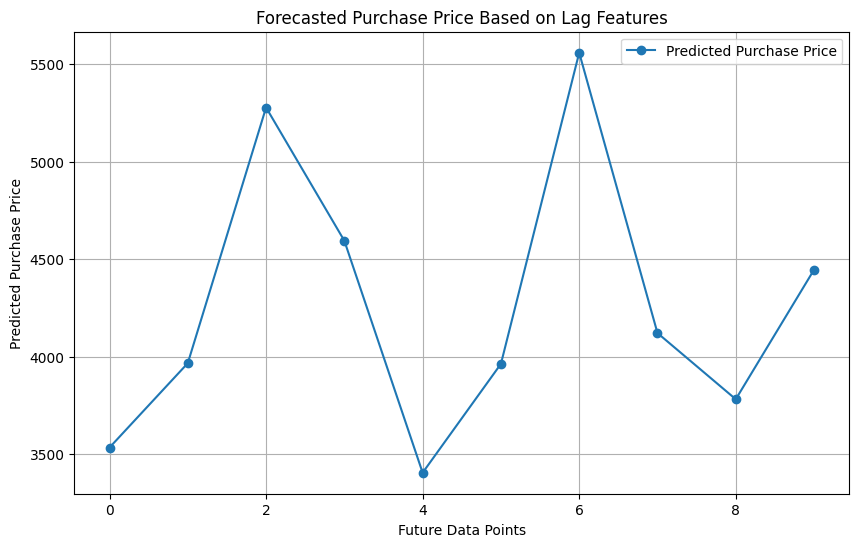

In [29]:
# Visualize the predicted vs. actual lag values
plt.figure(figsize=(10, 6))
plt.plot(future_df.index, future_df['Predicted_Purchase_Price'], marker='o', linestyle='-', label='Predicted Purchase Price')
plt.title('Forecasted Purchase Price Based on Lag Features')
plt.xlabel('Future Data Points')
plt.ylabel('Predicted Purchase Price')
plt.legend()
plt.grid(True)
plt.show()
